## Web Scraping

In [ ]:
import requests
from bs4 import BeautifulSoup # let you parse HTML data

In [ ]:
url = "https://finance.yahoo.com/quote/MSFT/balance-sheet?p=MSFT"

In [ ]:
page = requests.get(url)

In [ ]:
page

```<Response [200]>``` 的意思是你已經連接到這個網站的伺服器了

In [ ]:
print(type(page)) # page 是一個 requests 物件
page_content = page.content # 使用 .content method 叫出 request 物件的內容
page_content

到上一個步驟我們已經用 Python 製作出一個 html 物件，現在要用 BeaufiulSoup 來 parse(解析) 他

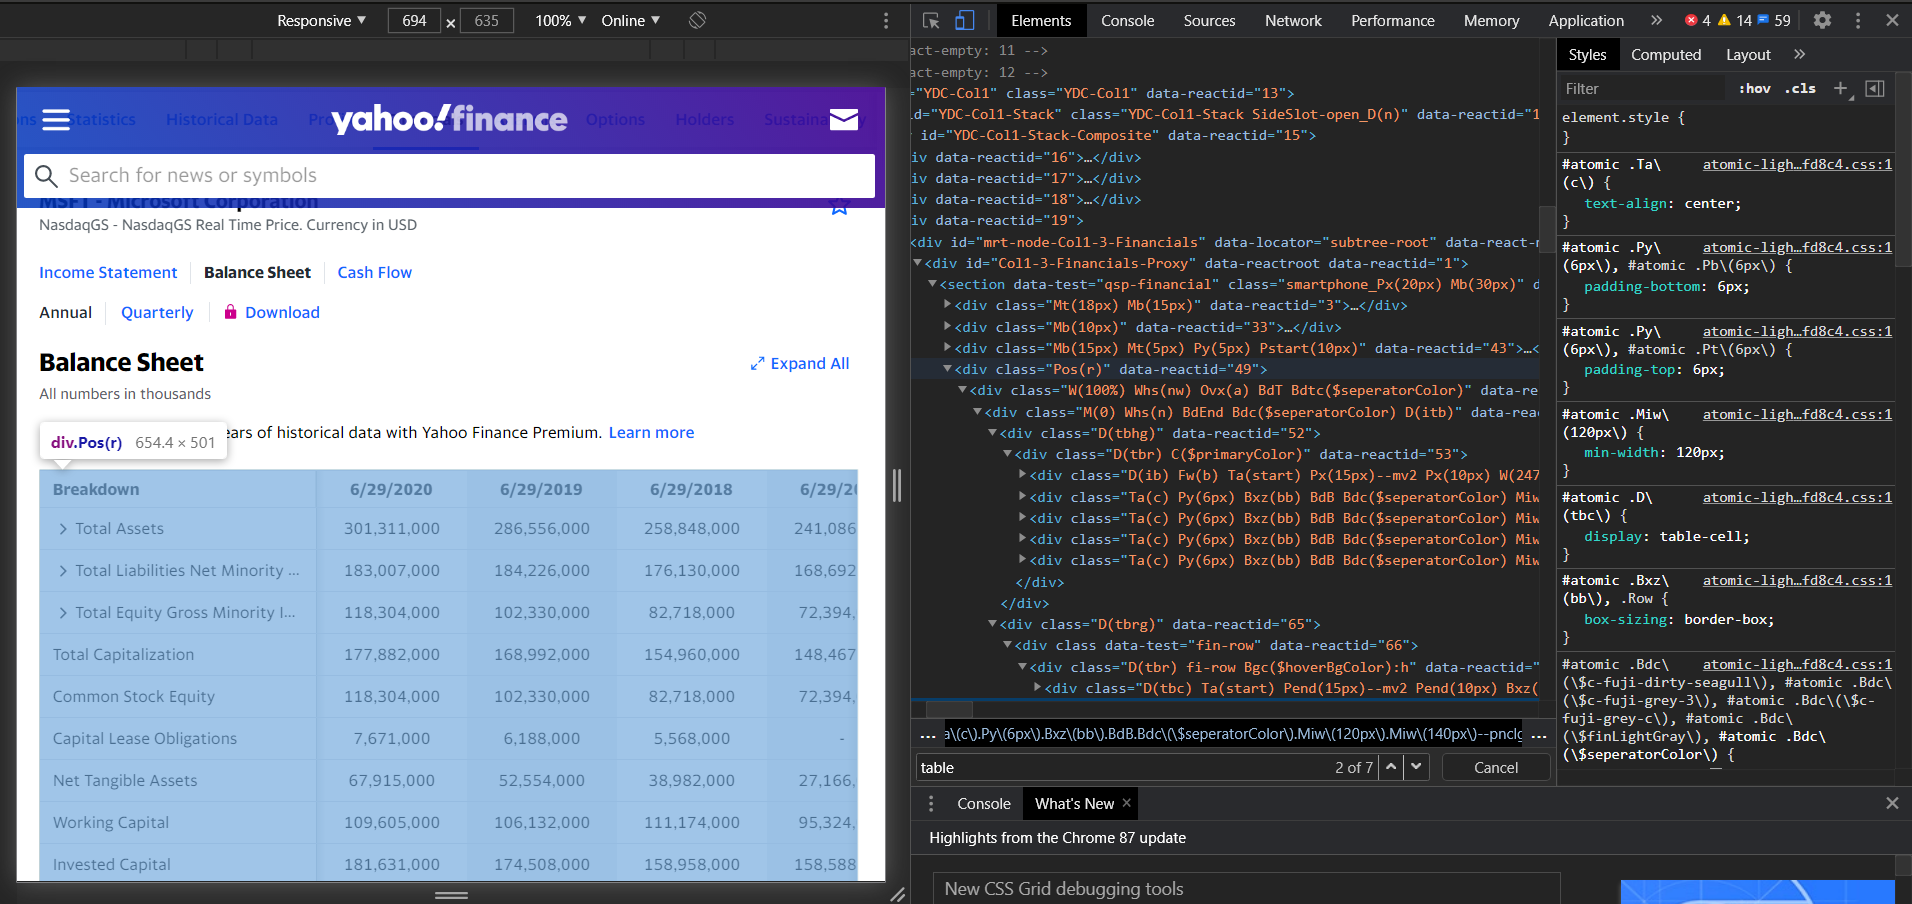

注意到左邊的藍色框框是整個 balance sheet 的範圍，而他對應到的 html code 是 ```<div class="Pos(r)" data-reactid="49">```

In [ ]:
soup = BeautifulSoup(page_content, 'html.parser')

In [ ]:
tabl = soup.find_all("div", {"class":"Pos(r)"})

In [ ]:
type(tabl)

我們現在找出 balance sheet 的 html code 了，注意到回傳值是 ```bs4.element.ResultSet```，這代表他是一個 ```集合```。  
而最終目標是解析出 balance sheet 裡的數字，那就可以用迴圈找:

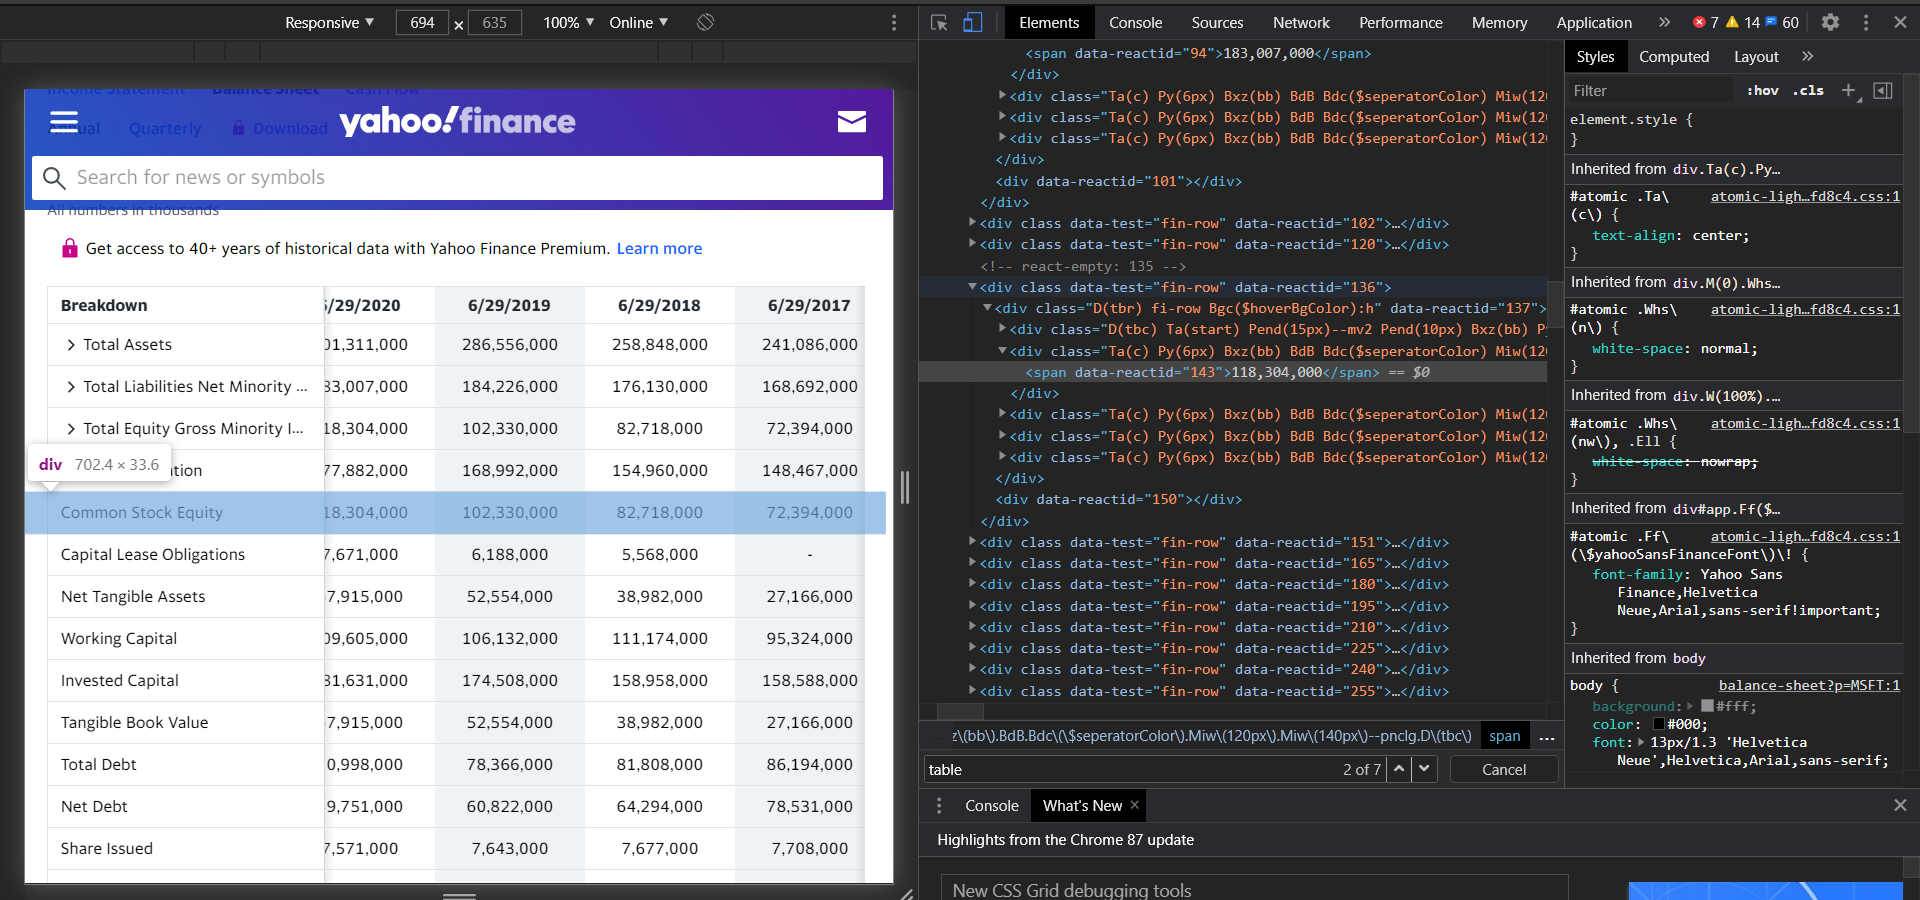

從上圖可以看出，每一個 row 都是一個財務數字，而將滑鼠移動到各 row，發現他們的 html code 都是  
 ```<div class data-test="fin-row" data-reactid...>```:

In [ ]:
i = 0
for t in tabl:
    i += 1
    print(type(t))
print(i)

發現如果對 ```bs4.element.ResultSet``` 做迴圈，裡面的 elements，型態是 ``` <class 'bs4.element.Tag'>```

In [25]:
for t in tabl:
    rows = soup.find_all("div", {"data-test":"fin-row"})
    for row in rows:
        print(row.get_text())

1,0006,188,0005,568,000-
Net Tangible Assets67,915,00052,554,00038,982,00027,166,000
Working Capital109,605,000106,132,000111,174,00095,324,000
Invested Capital181,631,000174,508,000158,958,000158,588,000
Tangible Book Value67,915,00052,554,00038,982,00027,166,000
Total Debt70,998,00078,366,00081,808,00086,194,000
Net Debt49,751,00060,822,00064,294,00078,531,000
Share Issued7,571,0007,643,0007,677,0007,708,000
Ordinary Shares Number7,571,0007,643,0007,677,0007,708,000
Total Assets301,311,000286,556,000258,848,000241,086,000
Total Liabilities Net Minority Interest183,007,000184,226,000176,130,000168,692,000
Total Equity Gross Minority Interest118,304,000102,330,00082,718,00072,394,000
Total Capitalization177,882,000168,992,000154,960,000148,467,000
Common Stock Equity118,304,000102,330,00082,718,00072,394,000
Capital Lease Obligations7,671,0006,188,0005,568,000-
Net Tangible Assets67,915,00052,554,00038,982,00027,166,000
Working Capital109,605,000106,132,000111,174,00095,324,000
Investe